# Lotka-Volterra competition

Developed by Johan van de Koppel, 2018

Description below is based on the wikipedia article: https://en.wikipedia.org/wiki/Competitive_Lotka–Volterra_equations

The competitive Lotka–Volterra equations are a simple model describing the competitive interaction between two species. They are based on the assumption that competing species negatively effect each others growth, without being explicit about what causes this interaction. The Lotka-Volterra equations are based on the logistic growth equation, which describes how increasing population density will cause increased competition, lowering growth rates until at some density $K$, the growth rate becomes zero, and the population has reach its carrying capacity. This equation reads:

$$
\begin{aligned}
\frac{dN}{dt} & = r\big(1 - \frac{N}{K}\big)N \\
\end{aligned}
$$

Here $r$ is the intrinsic growth rate of population $N$ in the absence of competition. The Lotka Volterra equations for competition expand this equation to describe two species $N_1$ and $N_2$:

$$
\begin{aligned}
\frac{dN_1}{dt} & = r_1\big(1 - \frac{(N_1 + a_{12} N_2)}{K_1}\big)N_1 \\
\frac{dN_2}{dt} & = r_2\big(1 - \frac{(N_2 + a_{21} N_1)}{K_2}\big)N_2 \\
\end{aligned}
$$

Here $a_{12}$ is the effect of species 2 on species 1, and $a_{21}$ is the effect of species 1 on species 2.

Below, we implement this model in python.

### Importing some packages

In [1]:
%matplotlib inline
import numpy as np  
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### Parameter definitions

In [2]:
r1  = 0.5    # Intrinsic growth rate for species 1
r2  = 0.5    # Intrinsic growth rate for species 2
K1  = 2.0    # Carrying capacity of species 1
K2  = 1.5    # Carrying capacity of species 2
a12 = 2.0    # Proportional effect of N2 on N1
a21 = 1.2    # Proportional effect of N1 on N2

### Simulation settings 

In [3]:
EndTime  = 100  # The length of the simulation (arbitrary unit)
NumPlots = 300  # The number of times the plot is drawn
dt       = 0.01 # The time step of the simulation, determines accuracy

### The differential equations as a function

In [4]:
def dN1_dt(N1,N2):
    return r1*N1*(1 - (N1 + a12*N2)/K1)
def dN2_dt(N1,N2): 
    return r2*N2*(1 - (N2 + a21*N1)/K2)

### Initial states

In [5]:
# Array containing population density at each time step
N1 = np.zeros(int(EndTime/dt)+1)  # A 1D array to contain species 1 
N2 = np.zeros(int(EndTime/dt)+1)  # A 1D array to contain species 2 

N1[0] = 1.55    # Species 1 initial value
N2[0] = 1.3284  # Species 2 initial value

### The loop that runs the simulation 

In [6]:
for times in range(np.int(EndTime/dt)):
    N1[times+1] = N1[times] + dt*dN1_dt(N1[times],N2[times])
    N2[times+1] = N2[times] + dt*dN2_dt(N1[times],N2[times])

### Computing the zero growth isoclines

In [7]:
# The consumer 1 isocline (line in phase space where prey growth is zero)
n1=np.linspace(1e-4, K1, 100)  # Declaratie van P1_iso2
N2_iso1 = (K1-n1)/a12

# The consumer 2 isocline (line in phase space where predator growth is zero)
n2=np.linspace(1e-4, K2, 100)  # Declaratie van P1_iso2
N1_iso2 = (K2-n2)/a21

### Drawing the temporal development and the phase space plot

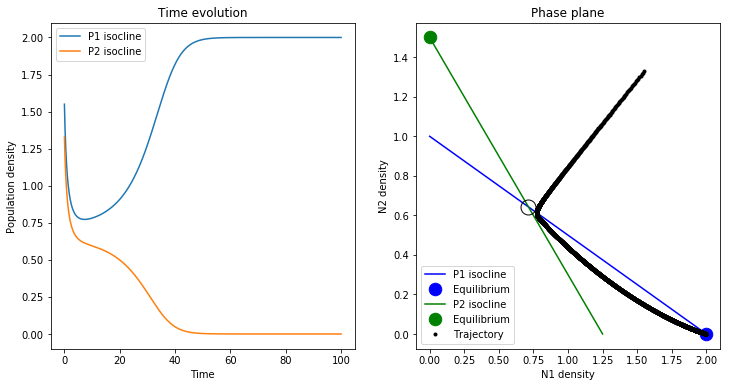

In [8]:
# Plotting the graph with the density vs time plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(np.linspace(0,EndTime,len(N1)),N1, label=f'P1 isocline')
ax[0].plot(np.linspace(0,EndTime,len(N2)),N2, label=f'P2 isocline')

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Population density')  
ax[0].set_title("Time evolution")
ax[0].legend();

# Plott the Phase Space plot

# The isocline for species 1
ax[1].plot( n1, N2_iso1,'b-', label=f'P1 isocline' )
# The point at the start of the isocline
ax[1].plot( n1[-1],0,'b.', markersize=25, label=f'Equilibrium')

# The isocline for species 1
ax[1].plot( N1_iso2, n2,'g-', label=f'P2 isocline' )
# The point at the start of the isocline
ax[1].plot( 0, n2[-1],'g.', markersize=25, label=f'Equilibrium')

ax[1].plot( N1, N2, 'k.', label=f'Trajectory' )

ax[1].set_xlabel('N1 density')
ax[1].set_ylabel('N2 density')  
ax[1].set_title("Phase plane")
ax[1].legend();

def equations(n):
    N1, N2 = n
    return ( r1*(1 - (N1 + a12*N2)/K1), r2*N2*(1 - (N2 + a21*N1)/K2) )

N1e, N2e =  fsolve(equations, (1, 1))

ax[1].plot( N1e,N2e,'k.', markersize=30, fillstyle='none', label=f'Equilibrium');

## A phase plane plot with streamlines  
To plot the isoclines in a phase plane plot, we have to define the values of *N1* and *N2* where *dN1/dt* and *dN2/dt* are zero. 

### Redefinition of the ODE functions

In [9]:
def dN1_dt(N1,N2,params):
    (K1,K2,a12,a21) = params
    return r1*N1*(1 - (N1 + a12*N2)/K1)
def dN2_dt(N1,N2,params):
    (K1,K2,a12,a21) = params
    return r2*N2*(1 - (N2 + a21*N1)/K2)

### Defining a plot function

In [10]:
def plot_system(K1,K2,a12,a21):
    
    N1max=max(K1,K2/a21)
    N2max=max(K2,K1/a12)
    
    N2i, N1i = np.mgrid[0:N2max*1.2:20j, 0:N1max*1.2:20j]
    params = (K1,K2,a12,a21)
    U = dN1_dt(N1i,N2i, params)
    V = dN2_dt(N1i,N2i, params)

    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.streamplot(N1i, N2i, U, V, density=0.8, color=U, linewidth=1)

    # The consumer 1 isocline (line in phase space where prey growth is zero)
    n1=np.linspace(1e-4, K1, 100)  # Declaratie van P1_iso2
    N2_iso1 = (K1-n1)/a12

    # The consumer 2 isocline (line in phase space where predator growth is zero)
    n2=np.linspace(1e-4, K2, 100)  # Declaratie van P1_iso2
    N1_iso2 = (K2-n2)/a21
    
    # The isocline for species 1
    ax.plot( n1, N2_iso1,'b-', label=f'P1 isocline' )
    # The point at the start of the isocline
    ax.plot( n1[-1],0,'b.', markersize=25, label=f'Equilibrium')

    # The isocline for species 1
    ax.plot( N1_iso2, n2,'r-', label=f'P2 isocline' )
    # The point at the start of the isocline
    ax.plot( 0, n2[-1],'r.', markersize=25, label=f'Equilibrium');

    def equations(n):
        N1, N2 = n
        return ( r1*(1 - (N1 + a12*N2)/K1), r2*N2*(1 - (N2 + a21*N1)/K2) )

    N1e, N2e =  fsolve(equations, (1, 1))

    if N1e>=0 and N2e>=0:
        ax.plot( N1e,N2e,'k.', markersize=30, fillstyle='none', label=f'Equilibrium');

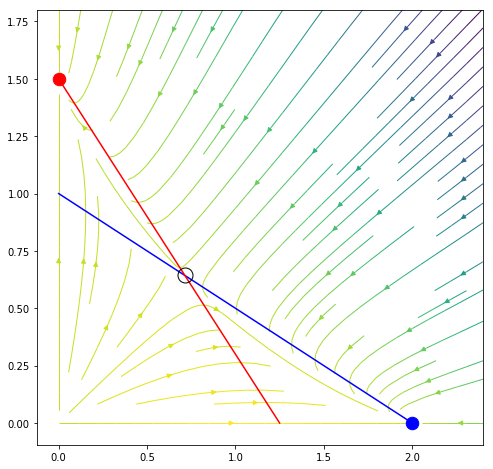

In [13]:
plot_system(K1,K2,a12,a21)

Copyright Johan van de Koppel 2018